In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('sampledl').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'Input':'float'})
dataset1 = dataset1.astype({'Output':'float'})

In [ ]:
dataset1.head()

,Input,Output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)


In [ ]:
ai_brain = Sequential([Dense(units=3,input_shape=[1]), Dense(units=3), Dense(units=1)])

In [ ]:
ai_brain.compile(optimizer="rmsprop", loss="mae")

In [ ]:
ai_brain.fit(X_train1, y_train, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 634ms/step - loss: 44.4281
Epoch 2/2000
1/1 [==============================] - 0s 11ms/step - loss: 44.4020
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 44.3832
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 44.3677
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 44.3539
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 44.3413
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 44.3296
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 44.3186
Epoch 9/2000
1/1 [==============================] - 0s 13ms/step - loss: 44.3080
Epoch 10/2000
1/1 [==============================] - 0s 12ms/step - loss: 44.2977
Epoch 11/2000
1/1 [==============================] - 0s 9ms/step - loss: 44.2878
Epoch 12/2000
1/1 [==============================] - 0s 9ms/step - loss: 44.2782
Epoch 13/2000
1/1 [============

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

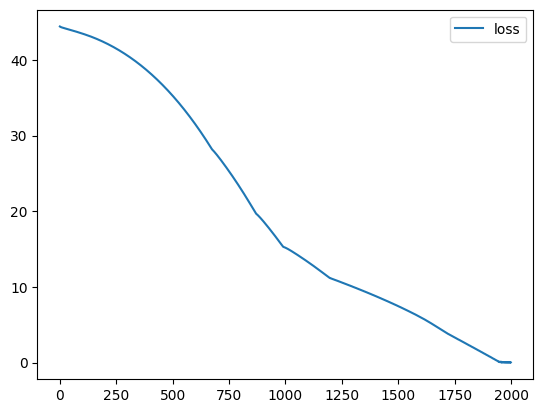

In [ ]:
loss_df.plot()


In [ ]:
X_test1 = Scaler.transform(X_test)


In [ ]:
ai_brain.evaluate(X_test1,y_test)


1/1 [==============================] - 0s 141ms/step - loss: 0.0784


0.07837867736816406

In [ ]:
X_n1 = [[30]]

In [ ]:
X_n1_1 = Scaler.transform(X_n1)


In [ ]:
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 106ms/step


array([[301.18832]], dtype=float32)